<center>
<h1>Free groups and train-tracks with Sage</h1>
<h3>Thierry Coulbois, Marseille</h3>
<code>thierry.coulbois@univ-amu.fr</code><br>
Bonn, July 2019
</center>

In [1]:
from train_track import *

<h2>1. Introduction</h2>
<ul>
    <li>Package written 6 years ago, more than 10 000 lines of code (in Sage/Python).
    <li>Mainly non-programming community (free group automorphisms). 
    <li>Main results [Bestvina, Feighn, Handel] around 1985. No strict statement about algorithmicity. 
    <li>Paper proving algorithmicity [Bogopolski, Maslakova, 2012, 70 pages]. 
    <li>Previously Java-applet [Brinkmann].
    <li>(Some) Mapping class groups are concerned, braid groups.
    
<ul>



<h2>2. Some math</h2>

<b>Free groups</b> = group of reduced words on an alphabet (with inverses)

In [2]:
FreeGroup(3)

Free Group on generators {x0, x1, x2}

In [3]:
F = FreeGroup('a,b,c')
F

Free Group on generators {a, b, c}

In [4]:
F('abacb')

a*b*a*c*b

In [5]:
w = F('abAbBc')
w

a*b*a^-1*c

In [7]:
print((w * w, w**5, w**-1))

((a*b*a^-1*c)^2, (a*b*a^-1*c)^5, c^-1*a*b^-1*a^-1)


<b>Automorphism of free group</b> = sort of a word morphism

In [13]:
phi = FreeGroupAutomorphism("a->ab,b->ac,c->a")
phi

Automorphism of the Free Group on generators {a, b, c}: a->a*b,b->a*c,c->a

In [10]:
print(phi("aC"))

a*b*a^-1


In [11]:
print(phi*phi)

a->a*b*a*c,b->a*b*a,c->a*b


<h3>Length of $\varphi^n(a)$ ?</h3>

In [12]:
a = phi.domain().gen(0)
a

a

In [19]:
print(phi(a,7).to_word())

abacabaabacababacabaabacabacabaabacababacabaabacabaabacababacabaabacabacabaabacab


In [22]:
M = phi.rose_representative().matrix()
M

[1 1 1]
[1 0 0]
[0 1 0]

In [23]:
M.eigenvalues()

[1.839286755214161?, -0.4196433776070806? - 0.6062907292071993?*I, -0.4196433776070806? + 0.6062907292071993?*I]

So we have easily:
$$\lim_{n\to\infty}\frac 1n\log|\varphi^n(a)|=1.839...$$

<h3>But what about inverses and cancellations?</h3>

In [14]:
phiinv = phi.inverse()
phiinv

Automorphism of the Free Group on generators {a, b, c}: a->c,b->c^-1*a,c->c^-1*b

In [26]:
phiinv(a,7).to_word()

word: AbAccAcc

In [15]:
f = phiinv.train_track()
f

Graph self map:
Marked graph: a: 0->0, b: 1->0, c: 1->0, e: 0->1
Marking: a->a, b->eb, c->ec
Edge map: a->ec, b->Ea, c->b, e->C
Irreducible representative

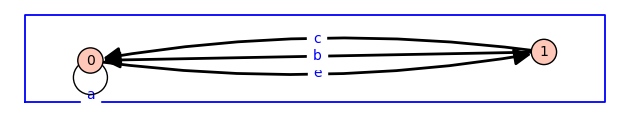

In [29]:
f.domain().plot()

In [31]:
Minv = f.matrix()
Minv

[0 1 0 0]
[0 0 1 0]
[1 0 0 1]
[1 1 0 0]

In [32]:
Minv.eigenvalues()

[-0.4746266175626056?, 1.395336994467073?, -0.4603551884522338? - 1.139317680301923?*I, -0.4603551884522338? + 1.139317680301923?*I]

So we have less easily:
$$\lim_{n\to\infty}\frac 1n\log|\varphi^{-n}(a)|=1.39533...$$

<h2>3. What next</h2>

<ul>
    <li>Code distributed as a package on pypi.org
    <li>Code cleaned, documented, doc-tested, by Dominique Bienelli (Research software engineer at our math department)
    <li>Bugs and updates
    <li>Compatibility with futur versions of Sage
    <li>Ticket for integration vs Sage (Python) package
    <li>Free groups wrapped from GAP [Miguel Angel Marco Buzunariz, Volker Braun] modifications in my package
    <li>New features (subgroups for free groups, fixed subgroups)
    <li>Free group automorphism still active
    <li>Category hierarchy (parents and such)
    
        
</ul>